In [1]:
#code to seeif the given person has an anual income of more than 50000 USD or not.

In [2]:
import numpy as np
import pandas as pd
import os


In [3]:
path = 'adult.csv'
data=pd.read_csv(path)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
import matplotlib.pyplot as plt

In [6]:
import warnings
warnings.filterwarnings("ignore")
##setting the max column limit
#pd.set_option("max_columns",500)

In [7]:
data.shape

(32561, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data.isnull()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
#no null values found

In [12]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
#capital.gain and capital.loss more than 90% values are zeros.So , the variables highly skewed

In [14]:
#Checking the target variable
data.income.value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

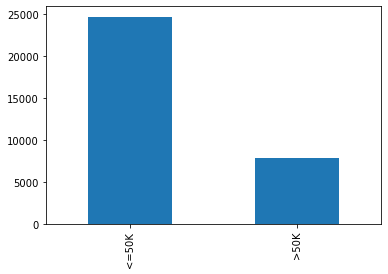

In [15]:
#Visualising the target variable for checking whether the dataset is imbalanced or not
data.income.value_counts().plot(kind='bar')
plt.show()

In [16]:
#grouping categorical variables

In [17]:
cat_vars = [x for x in data.columns if data[x].dtype =="object"]
cat_vars

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [18]:
#numerical variables

In [19]:
num_vars = [x for x in data.columns if x not in cat_vars]
num_vars

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [20]:
#checking for unique values in categorical variables


In [21]:
for i in cat_vars:
    print("-----"+i+"-----")
    print(data[i].value_counts(normalize=True))
    print("\n")

-----workclass-----
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64


-----education-----
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64


-----marital.status-----
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Ma

In [22]:
#grouping categories whose values are very less

In [23]:
#for working class

def assign(x):
    check = ['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']
    if x in check:
        return "others"
    else:
        return x

data["workclass"] = pd.DataFrame(map(assign,data["workclass"]))

In [24]:
data["workclass"].value_counts(normalize=True)

Private             0.697030
others              0.104266
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
Name: workclass, dtype: float64

In [25]:
#for education

def assign(x):
    check = ['10th','7th-8th','Prof-school','9th','12th','Doctorate','5th-6th','1st-4th','Preschool']
    if x in check:
        return "others"
    else:
        return x

data["education"] = pd.DataFrame(map(assign,data["education"]))

In [26]:
data["education"].value_counts(normalize=True)

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
others          0.124904
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
Name: education, dtype: float64

In [27]:
#on marital status

def assign(x):
    check = ['Widowed', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse']
    if x in check:
        return "others"
    else:
        return x

data["marital.status"] = pd.DataFrame(map(assign,data["marital.status"]))

In [28]:
data["marital.status"].value_counts(normalize=True)

Married-civ-spouse    0.459937
Never-married         0.328092
Divorced              0.136452
others                0.075520
Name: marital.status, dtype: float64

In [29]:
# on occupation

def assign(x):
    check = ['others','Transport-moving','Handlers-cleaners','Farming-fishing','Tech-support','Protective-serv','Priv-house-serv','Armed-Forces']
    if x in check:
        return "others"
    else:
        return x

data["occupation"] = pd.DataFrame(map(assign,data["occupation"]))

In [30]:
data["occupation"].value_counts(normalize=True)

others               0.174933
Prof-specialty       0.127146
Craft-repair         0.125887
Exec-managerial      0.124873
Adm-clerical         0.115783
Sales                0.112097
Other-service        0.101195
Machine-op-inspct    0.061485
?                    0.056601
Name: occupation, dtype: float64

In [31]:
# on race

def assign(x):
    check = ['Amer-Indian-Eskimo','Other','Asian-Pac-Islander']
    if x in check:
        return "others"
    else:
        return x

data["race"] = pd.DataFrame(map(assign,data["race"]))

In [32]:
data["race"].value_counts()

White     27816
Black      3124
others     1621
Name: race, dtype: int64

In [33]:
# on native country

def assign(x):
    check = ['Greece','Vietnam', 'China','Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada','South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran','England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba','Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic','Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala','Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland','Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)','others']
    if x in check:
        return "others"
    else:
        return x

data["native.country"] = pd.DataFrame(map(assign,data["native.country"]))


In [34]:
data['native.country'].value_counts(normalize=True)

United-States    0.895857
others           0.066491
Mexico           0.019748
?                0.017905
Name: native.country, dtype: float64

In [35]:
#Replacing the ? sign in "Workclass","occupation","native.country" columns
data["workclass"] = data["workclass"].replace("?","others")
data["occupation"] = data["occupation"].replace("?","others")
data["native.country"] = data["native.country"].replace("?","others")

In [36]:
#analysing numerical columns

In [37]:
data['age'].describe([0.25,0.5,0.75,1])

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
100%        90.000000
max         90.000000
Name: age, dtype: float64

In [38]:
data['fnlwgt'].describe([0.25,0.5,0.75,1])

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
100%     1.484705e+06
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [39]:
data['education.num'].describe([0.25,0.5,0.75,1])

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
100%        16.000000
max         16.000000
Name: education.num, dtype: float64

In [40]:
data['capital.gain'].describe([0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.99,1])

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
90%          0.000000
95%       5013.000000
99%      15024.000000
100%     99999.000000
max      99999.000000
Name: capital.gain, dtype: float64

In [41]:
data['capital.loss'].describe([0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.99,1])

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
90%          0.000000
95%          0.000000
99%       1980.000000
100%      4356.000000
max       4356.000000
Name: capital.loss, dtype: float64

In [42]:
#since most values are 0, dropping capital loss

In [43]:
data.drop('capital.loss',1,inplace=True)

In [44]:
#creating dummy variables for converting object data into numerical data

In [45]:
# 'workclass'
wc = pd.get_dummies(data[["workclass"]],drop_first = True)
data = pd.concat([data,wc],axis=1)
# 'education' 
edu = pd.get_dummies(data[["education"]],drop_first = True)
data = pd.concat([data,edu],axis=1)
# 'marital.status'
ms = pd.get_dummies(data[["marital.status"]],drop_first = True)
data = pd.concat([data,ms],axis=1)
# 'occupation'
occu =pd.get_dummies(data[["occupation"]],drop_first = True)
data = pd.concat([data,occu],axis=1) 
# 'relationship'
rel =pd.get_dummies(data[["relationship"]],drop_first = True)
data = pd.concat([data,rel],axis=1)
# 'race'
race = pd.get_dummies(data[["race"]],drop_first = True)
data = pd.concat([data,race],axis=1) 
# 'native.country'
nc = pd.get_dummies(data[["native.country"]],drop_first = True) 
data = pd.concat([data,nc],axis=1)

In [46]:
data.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,occupation_others,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,race_others,native.country_United-States,native.country_others
0,90,others,77053,HS-grad,9,others,others,Not-in-family,White,Female,...,1,1,0,0,0,0,1,0,1,0
1,82,Private,132870,HS-grad,9,others,Exec-managerial,Not-in-family,White,Female,...,0,1,0,0,0,0,1,0,1,0
2,66,others,186061,Some-college,10,others,others,Unmarried,Black,Female,...,1,0,0,0,1,0,0,0,1,0
3,54,Private,140359,others,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,0,1,0,1,0,1,0
4,41,Private,264663,Some-college,10,others,Prof-specialty,Own-child,White,Female,...,0,0,0,1,0,0,1,0,1,0


In [47]:
#Creating a function for converting binary variable
def binary(x):
    if x == "Male":
        return 1
    else:
        return 0

In [48]:
data["sex"] = data["sex"].apply(binary)

In [49]:
#dropping the columns, since i already created dummys
data.drop(['workclass','education','marital.status','occupation','relationship','race','native.country'],axis=1,inplace=True)

In [50]:
data.head()

,age,fnlwgt,education.num,sex,capital.gain,hours.per.week,income,workclass_Private,workclass_Self-emp-not-inc,workclass_others,...,occupation_others,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,race_others,native.country_United-States,native.country_others
0,90,77053,9,0,0,40,<=50K,0,0,1,...,1,1,0,0,0,0,1,0,1,0
1,82,132870,9,0,0,18,<=50K,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,66,186061,10,0,0,40,<=50K,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,54,140359,4,0,0,40,<=50K,1,0,0,...,0,0,0,0,1,0,1,0,1,0
4,41,264663,10,0,0,40,<=50K,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [51]:
#Treating the target variable(if income >50k then it is 1 else it is 0)
data["income"] = data["income"].apply(lambda x:1 if x == ">50K" else 0)

In [52]:
data["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [53]:
X = data.drop("income",axis=1)
X.head()

,age,fnlwgt,education.num,sex,capital.gain,hours.per.week,workclass_Private,workclass_Self-emp-not-inc,workclass_others,education_Assoc-acdm,...,occupation_others,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,race_others,native.country_United-States,native.country_others
0,90,77053,9,0,0,40,0,0,1,0,...,1,1,0,0,0,0,1,0,1,0
1,82,132870,9,0,0,18,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,66,186061,10,0,0,40,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,54,140359,4,0,0,40,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,41,264663,10,0,0,40,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [54]:
y = data["income"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [55]:
#doing a simple test train split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [58]:
#doing a standard scale

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
#we have to remove 'capital.loss' since we have removed it from our main dataframe
num_vars.remove('capital.loss')

In [62]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [63]:
X_train.head()

,age,fnlwgt,education.num,sex,capital.gain,hours.per.week,workclass_Private,workclass_Self-emp-not-inc,workclass_others,education_Assoc-acdm,...,occupation_others,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,race_others,native.country_United-States,native.country_others
29313,0.170452,-0.810066,-0.032621,1,-0.146478,0.770137,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
16021,-1.290407,0.127165,-0.032621,1,-0.146478,-0.040732,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
905,0.462623,-0.484507,-0.032621,1,-0.146478,0.770137,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
31251,0.608709,-0.660094,1.135803,1,-0.146478,-0.040732,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3368,-1.144321,-1.487768,-0.032621,1,0.410901,-0.040732,1,0,0,0,...,1,1,0,0,0,0,1,0,1,0


In [64]:
#using SVM model

In [65]:
from sklearn import svm

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)

SVC()

In [68]:

from sklearn.metrics import accuracy_score


#Transform on the test set
X_test[num_vars] = scaler.transform(X_test[num_vars])

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8549493295117208

In [70]:
#We get an above average score of 0.76 without scaling test variables
#Finally we get a good prediction accuracy of 85 percent with scaling

In [72]:
print(confusion_matrix(y_test,y_pred))

[[7019  422]
 [ 995 1333]]


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7441
           1       0.76      0.57      0.65      2328

    accuracy                           0.85      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.85      0.85      9769

